In [1]:
# main function
import torch
import GFN_dataset
import GFN_model
import GFN_optimal
import os
import numpy as np
import torch.nn as nn
# setting parameters
D_1 = 1e-3
D_2 = 5e-3
#func_f = lambda u,w: u-u**3-5e-3-w
#func_g = None
func_f = lambda u,w: 0
func_g = lambda u,w: 0
a = 0.1
epsilon = 1
gamma = 1
bc = None
batch_size = 32
train_curve_num= 1600
test_curve_num= 300
sample_size=25
T_range=[0,2.5]
delta_t=1e-3
range_grid=[[-1,1],[-1,1]]
period=[True,True]
num_grid=[64,64]
seed_train=None
seed_test=20221106
initial=[0,1]
noise_sigma=0.1
dim=2
hidden=[16,64,64,16]
lambda_0 = 1.0
tau_1 = 2e-4
tau_2 = 1
niter = 5
nupdate = 50
nepoch = 100
nlog= 5
path = "./exp_gpu"
path_train = '_train_gfn_zero'
path_test = '_test_gfn_zero'
os.makedirs(path,exist_ok=True)
os.makedirs("./outputs",exist_ok=True)

device = torch.device("cuda:1")# if torch.cuda.is_available() else "cpu")


# generate data
train,test = GFN_dataset.create_data(path_train=path_train,path_test=path_test,
    D_1=D_1,D_2=D_2,func_f=func_f,func_g=func_g,a=a,epsilon=epsilon,gamma=gamma,bc=bc,
    batch_size=batch_size,train_curve_num=train_curve_num,test_curve_num=test_curve_num,
    sample_size=sample_size,T_range=T_range,delta_t=delta_t,range_grid=range_grid,
    period=period,num_grid=num_grid,seed_train=seed_train,seed_test=seed_test,
    initial=initial,noise_sigma=noise_sigma,dim=dim)

# construct model
para_model = GFN_model.ParametricPart(dx=(range_grid[0][1]-range_grid[0][0])/num_grid[0])
nonpara_model = GFN_model.NonParametricModel(state_dim=dim,hidden=hidden)

mode = 1
penalty = None#'orthogonal'
#whole model
full_model = GFN_model.SemiParametericModel(para_model,nonpara_model,mode=mode,penalty=penalty)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


ValueError: too many values to unpack (expected 2)

In [2]:
import pde
import numpy as np
import torch.nn as nn
import torch
grid = pde.CartesianGrid([[-1,1],[-1,1]], [16,16],[True,True])
grid = pde.ScalarField.from_expression(grid, 'x')


In [8]:
grid

ScalarField(grid=CartesianGrid(bounds=((-1.0, 1.0), (-1.0, 1.0)), shape=(16, 16), periodic=[True, True]), data=[[-0.9375 -0.9375 -0.9375 -0.9375 -0.9375 -0.9375 -0.9375 -0.9375 -0.9375
  -0.9375 -0.9375 -0.9375 -0.9375 -0.9375 -0.9375 -0.9375]
 [-0.8125 -0.8125 -0.8125 -0.8125 -0.8125 -0.8125 -0.8125 -0.8125 -0.8125
  -0.8125 -0.8125 -0.8125 -0.8125 -0.8125 -0.8125 -0.8125]
 [-0.6875 -0.6875 -0.6875 -0.6875 -0.6875 -0.6875 -0.6875 -0.6875 -0.6875
  -0.6875 -0.6875 -0.6875 -0.6875 -0.6875 -0.6875 -0.6875]
 [-0.5625 -0.5625 -0.5625 -0.5625 -0.5625 -0.5625 -0.5625 -0.5625 -0.5625
  -0.5625 -0.5625 -0.5625 -0.5625 -0.5625 -0.5625 -0.5625]
 [-0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.4375
  -0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.4375]
 [-0.3125 -0.3125 -0.3125 -0.3125 -0.3125 -0.3125 -0.3125 -0.3125 -0.3125
  -0.3125 -0.3125 -0.3125 -0.3125 -0.3125 -0.3125 -0.3125]
 [-0.1875 -0.1875 -0.1875 -0.1875 -0.1875 -0.1875 -0.1875 -0.1875 -0.1875
  -0.1875 -0.1875

In [13]:
np.linspace(0.,2.5,51,endpoint=True)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ])

In [3]:
a = torch.tensor([[1,2],[3,4]])
a.view(4,1)

tensor([[1],
        [2],
        [3],
        [4]])

In [9]:
a = torch.tensor([[x,y] for x in range(4) for y in range(4)])
a.view(16,2)

tensor([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [2, 0],
        [2, 1],
        [2, 2],
        [2, 3],
        [3, 0],
        [3, 1],
        [3, 2],
        [3, 3]])

In [10]:
import numpy as np
[1/(1+0.1*(20-x)**2) for x in np.linspace(0,40,401,endpoint=True)]

[0.024390243902439025,
 0.024629935223270363,
 0.024873146950552177,
 0.02511994775050868,
 0.025370407956159927,
 0.025624599615631006,
 0.025882596542085103,
 0.026144474365342882,
 0.026410310585252485,
 0.02668018462687761,
 0.026954177897574122,
 0.02723237384602816,
 0.027514858023332592,
 0.027801718146181435,
 0.02809304416226542,
 0.028388928317955996,
 0.028689465228368148,
 0.028994751949897066,
 0.029304888055327633,
 0.02961997571161991,
 0.029940119760479042,
 0.03026542780182198,
 0.03059601028025945,
 0.030931980574716206,
 0.031273455091318486,
 0.03162055335968379,
 0.03197339813275355,
 0.03233211549031653,
 0.03269683494637719,
 0.033067689560530404,
 0.033444816053511704,
 0.0338283549270999,
 0.034218450588557346,
 0.034615251479802,
 0.03501891021151421,
 0.03542958370239149,
 0.03584743332377402,
 0.03627262504987486,
 0.03670532961385993,
 0.037145722670034534,
 0.03759398496240601,
 0.03805030249990488,
 0.03851486673856108,
 0.038987874770946236,
 0.039469529

In [18]:
a = full_model.nonpara_model.net.state_dict()
print(a)

OrderedDict([('0.weight', tensor([[ 0.2883, -0.3798],
        [-0.2928, -0.2982],
        [ 0.3213, -0.1138],
        [ 0.5939,  0.6586],
        [ 0.4909,  0.3888],
        [ 0.0133,  0.5867],
        [ 0.1756,  0.4344],
        [ 0.3452, -0.1942],
        [-0.6789, -0.1493],
        [-0.3087, -0.2238],
        [-0.0497,  0.3250],
        [-0.4829,  0.6424],
        [ 0.6125, -0.5096],
        [ 0.5629, -0.6460],
        [ 0.0697, -0.5349],
        [ 0.2435, -0.5879]])), ('0.bias', tensor([ 1.6597e-01, -1.4530e-01, -2.1542e-01, -2.9715e-01, -6.1348e-01,
        -5.1887e-01, -6.6770e-01,  1.9606e-01,  6.1219e-02, -5.2414e-04,
        -1.0276e-01, -4.9339e-01,  6.6249e-01,  1.3850e-01,  4.9389e-01,
        -4.4644e-01])), ('2.weight', tensor([[-0.2044,  0.2329, -0.0731,  ..., -0.1693, -0.2100,  0.1148],
        [ 0.1260, -0.0865,  0.0114,  ...,  0.2035, -0.1491,  0.1053],
        [-0.2310,  0.0540, -0.1095,  ..., -0.2330,  0.1626,  0.2010],
        ...,
        [-0.0260, -0.1491, -0.119

In [20]:
a = nn.Parameter(torch.tensor(1.0))
a.to('cuda:1')

/home/yuanyuanbenben/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


tensor(1., device='cuda:1', grad_fn=<ToCopyBackward0>)

In [15]:
a = np.array([0.,0.])
a += np.array([1.412,2.235])
print(a)

[1.412 2.235]


In [1]:
import torch.nn as nn

In [1]:
import torch
checkpoint = torch.load('./checkpoint/ckpt_rcd_PINN_para_1_1_20_0.050_1.000_0.100.pth')
print(checkpoint['D_1'])
print(checkpoint['D_2'])
print(checkpoint['D_3'])
print(checkpoint['epoch'])

Parameter containing:
tensor(0.0900, device='cuda:0', requires_grad=True)
Parameter containing:
tensor(0.0837, device='cuda:0', requires_grad=True)
Parameter containing:
tensor(0.1039, device='cuda:0', requires_grad=True)
4899


In [12]:
import pde
import torch.nn as nn
import torch
_grid = pde.CartesianGrid([[-0.125,25.125],[-1,1],[-1,1]], [101,16,16], [True,True,True])
grid = nn.Parameter(torch.tensor(
            pde.VectorField.from_expression(_grid,["x","y","z"]).data
        ).float().permute(1,2,3,0),requires_grad=False)
grid[:,0,0,0]

tensor([ 0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000,  2.2500,  2.5000,  2.7500,  3.0000,  3.2500,  3.5000,  3.7500,
         4.0000,  4.2500,  4.5000,  4.7500,  5.0000,  5.2500,  5.5000,  5.7500,
         6.0000,  6.2500,  6.5000,  6.7500,  7.0000,  7.2500,  7.5000,  7.7500,
         8.0000,  8.2500,  8.5000,  8.7500,  9.0000,  9.2500,  9.5000,  9.7500,
        10.0000, 10.2500, 10.5000, 10.7500, 11.0000, 11.2500, 11.5000, 11.7500,
        12.0000, 12.2500, 12.5000, 12.7500, 13.0000, 13.2500, 13.5000, 13.7500,
        14.0000, 14.2500, 14.5000, 14.7500, 15.0000, 15.2500, 15.5000, 15.7500,
        16.0000, 16.2500, 16.5000, 16.7500, 17.0000, 17.2500, 17.5000, 17.7500,
        18.0000, 18.2500, 18.5000, 18.7500, 19.0000, 19.2500, 19.5000, 19.7500,
        20.0000, 20.2500, 20.5000, 20.7500, 21.0000, 21.2500, 21.5000, 21.7500,
        22.0000, 22.2500, 22.5000, 22.7500, 23.0000, 23.2500, 23.5000, 23.7500,
        24.0000, 24.2500, 24.5000, 24.75

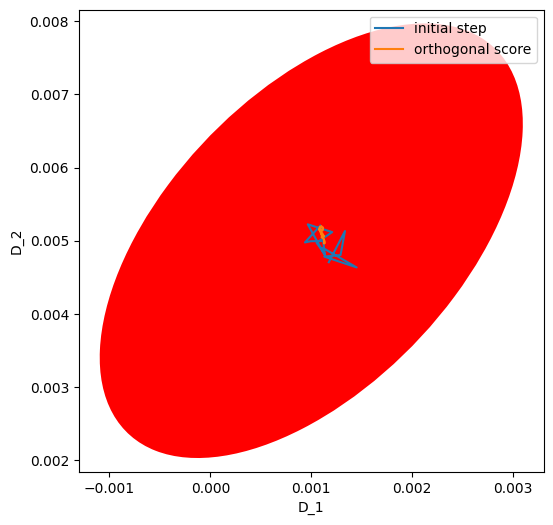

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np


data_firststep = np.load("./outputs/gfn/pre_train.npy")
data_orthogonal = np.load("./outputs/gfn/final_result.npy")
data_variance = np.load("./outputs/gfn/variance.npy")

fig, ax_kwargs = plt.subplots(figsize=(6, 6))
ax_kwargs.plot(data_firststep[2,10:],data_firststep[3,10:],data_orthogonal[0,],data_orthogonal[1,])
lambda_, v = np.linalg.eig(data_variance)
angle = np.rad2deg(np.arccos(v[0,0]))
ell_radius_x = np.sqrt(lambda_[0])
ell_radius_y = np.sqrt(lambda_[1])
ellip = Ellipse((1e-3,5e-3),width = ell_radius_x * 2, height = ell_radius_y * 2, facecolor = 'red', angle = angle)
ax_kwargs.add_patch(ellip)
ax_kwargs.legend(labels = ['initial step','orthogonal score'],loc=1)
plt.ylabel('D_2')
plt.xlabel('D_1')
plt.show()

In [11]:
ell_radius_y

0.0032592441

In [28]:
import torch
import torch.nn as nn
from collections import OrderedDict
import torch.nn.functional as F
from torchdiffeq import odeint
from neurodiffeq.solvers import Solver1D
from neurodiffeq.monitors import Monitor1D
from neurodiffeq.conditions import IVP
from neurodiffeq import diff
from neurodiffeq.networks import FCNN    # fully-connect neural network
from neurodiffeq.networks import SinActv # sin activation
import numpy as np

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

RuntimeError: The size of tensor a (32) must match the size of tensor b (3) at non-singleton dimension 0

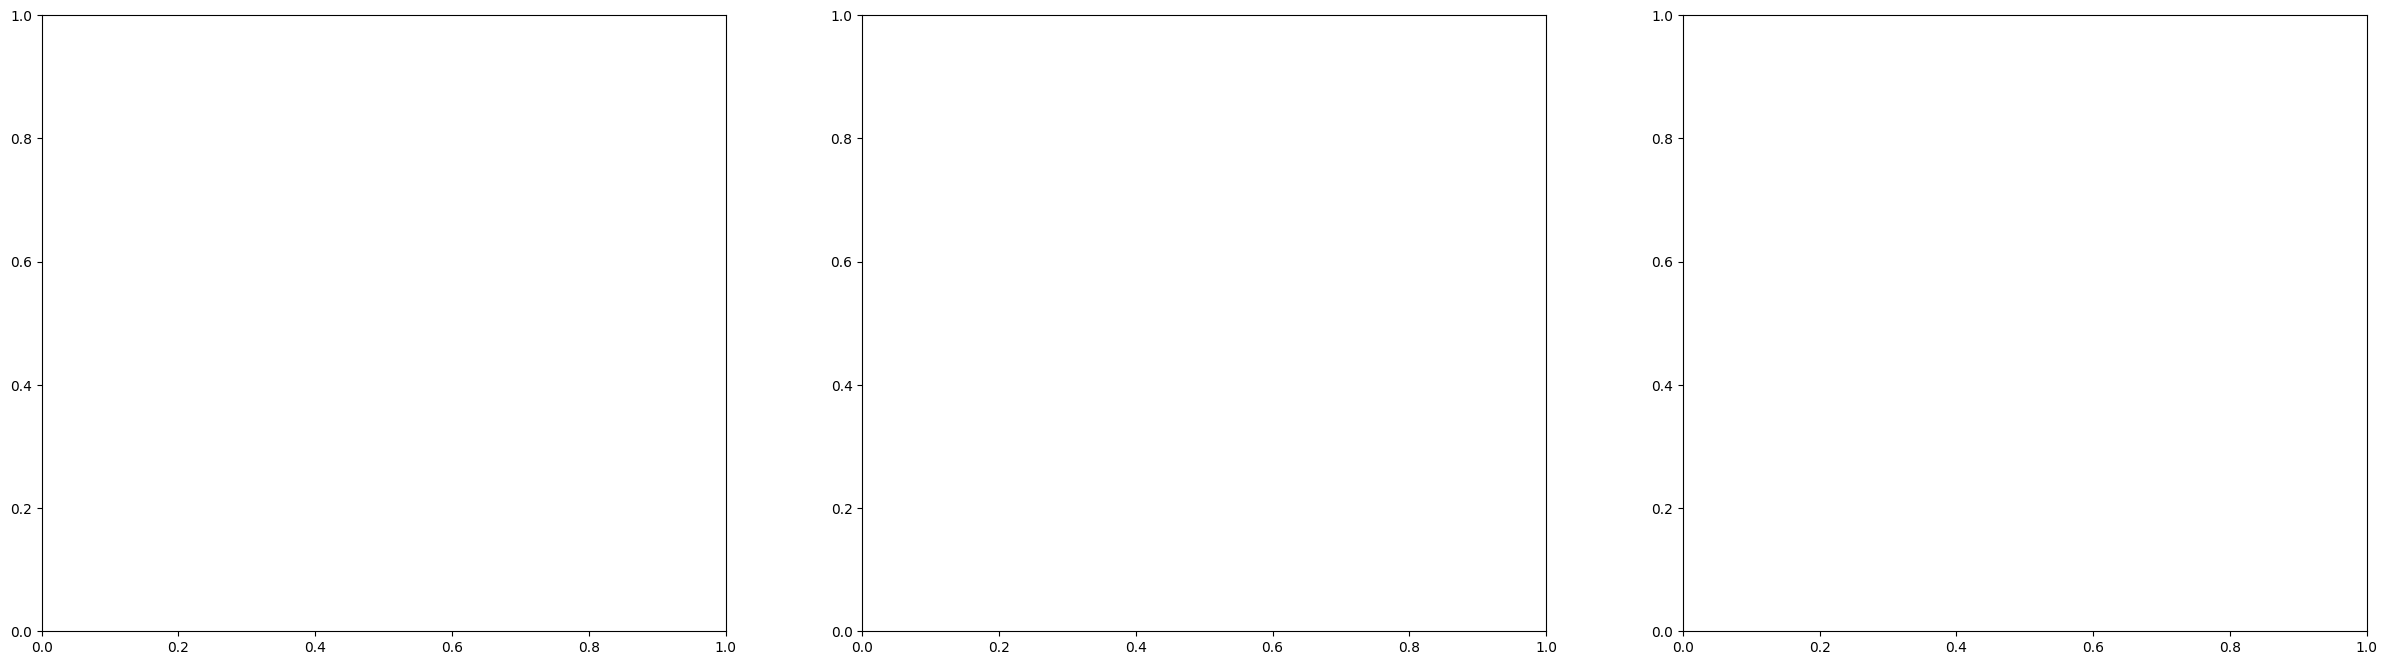

In [52]:
t_0 = torch.tensor(
     [
                [ 0,  0,  0],
                [ 0, 0,  0],
                [ 0,  0,  0],
            ],
        ).float().view(3, 3)
u_0 = torch.tensor(
     [
                [ 0,  1,  0],
                [ 1, -4,  1],
                [ 0,  1,  0],
            ],
        ).float().view(3, 3)
t_interval = torch.tensor(
     [0.1,0.2,0.3,0.5,1.0,1.5,2.0],
        ).float()
exponential = lambda u, t: [diff(u, t) + u]
monitor = Monitor1D(t_min=0.0, t_max=2.0, check_every=100)
monitor_callback = monitor.to_callback()
bound_condition = [IVP(t_0 = 0.0, u_0 = 0.0)]
nets_lv = [
    FCNN(n_input_units=1, n_output_units=1, hidden_units=(32, 32), actv=SinActv)
]
net_solver = Solver1D(ode_system=exponential,conditions=bound_condition,t_min = 0.0,t_max = 2.0,nets=nets_lv)
net_solver.fit(max_epochs=100, callbacks=[monitor_callback])
solutions = net_solver.get_solution()
working_solution = solutions([1.0,1.4])


In [51]:
working_solution

tensor([0.3966, 0.2635], grad_fn=<ReshapeAliasBackward0>)

Training Progress:   0%|          | 0/3000 [00:00<?, ?it/s]

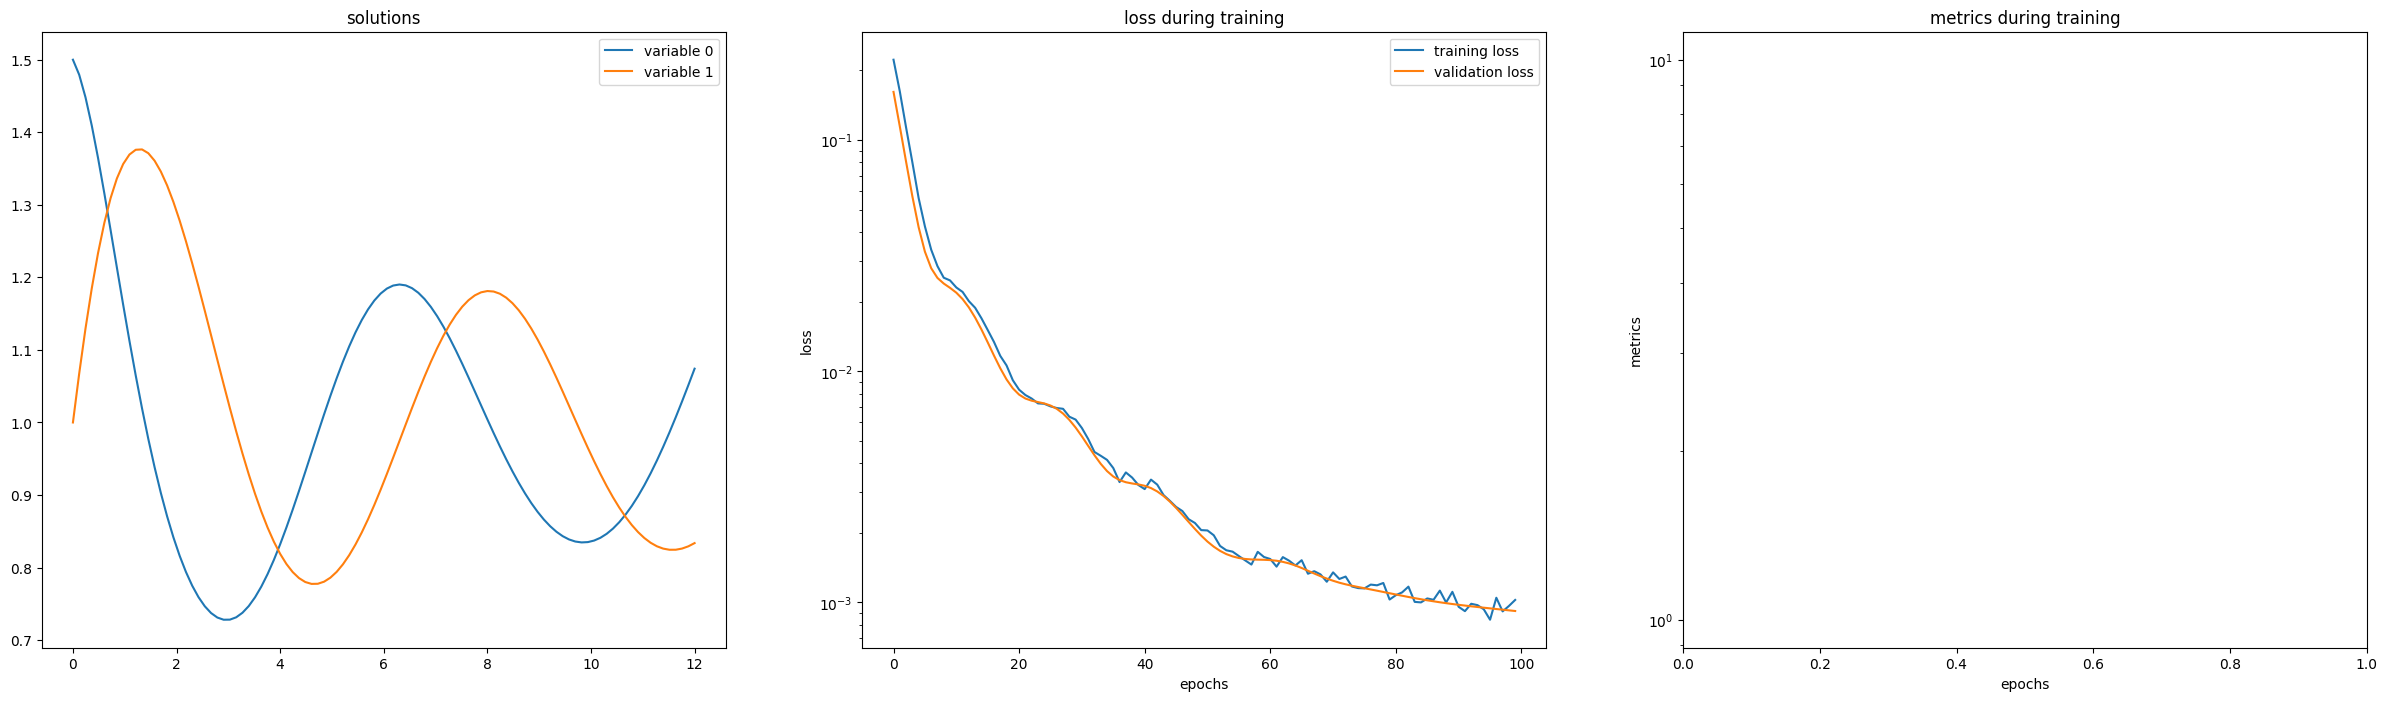

In [32]:
from neurodiffeq.solvers import Solver1D
alpha, beta, delta, gamma = 1, 1, 1, 1
lotka_volterra = lambda u, t : [ diff(u, t) - (alpha*u  - beta*u*v),
                                    diff(v, t) - (delta*u*v - gamma*v), ]
# specify the initial conditions
init_vals_lv = [
    IVP(t_0=0.0, u_0=1.5),  # 1.5 is the value of u at t_0 = 0.0
    IVP(t_0=0.0, u_0=1.0),  # 1.0 is the value of v at t_0 = 0.0
]

# specify the network to be used to approximate each dependent variable
# the input units and output units default to 1 for FCNN
nets_lv = [
    FCNN(n_input_units=1, n_output_units=1, hidden_units=(32, 32), actv=SinActv),
    FCNN(n_input_units=1, n_output_units=1, hidden_units=(32, 32), actv=SinActv)
]

# Let's create a monitor first
monitor = Monitor1D(t_min=0.0, t_max=12.0, check_every=100)
# ... and turn it into a Callback instance
monitor_callback = monitor.to_callback()

# Instantiate a solver instance
solver = Solver1D(
    ode_system=lotka_volterra,
    conditions=init_vals_lv,
    t_min=0.1,
    t_max=12.0,
    nets=nets_lv,
)

# Fit the solver (i.e., train the neural networks)
solver.fit(max_epochs=3000, callbacks=[monitor_callback])

# Get the solution
solution_lv = solver.get_solution()

In [33]:
solution_lv(np.linspace(0, 2.0, 50))

[tensor([1.5000, 1.4999, 1.4981, 1.4947, 1.4897, 1.4833, 1.4754, 1.4662, 1.4557,
         1.4439, 1.4311, 1.4171, 1.4021, 1.3862, 1.3695, 1.3520, 1.3338, 1.3149,
         1.2956, 1.2757, 1.2555, 1.2349, 1.2141, 1.1931, 1.1720, 1.1509, 1.1297,
         1.1086, 1.0877, 1.0669, 1.0463, 1.0260, 1.0060, 0.9864, 0.9672, 0.9484,
         0.9300, 0.9122, 0.8948, 0.8780, 0.8617, 0.8460, 0.8308, 0.8163, 0.8023,
         0.7889, 0.7762, 0.7640, 0.7524, 0.7415],
        grad_fn=<ReshapeAliasBackward0>),
 tensor([1.0000, 1.0204, 1.0415, 1.0630, 1.0849, 1.1070, 1.1293, 1.1516, 1.1738,
         1.1959, 1.2177, 1.2391, 1.2600, 1.2805, 1.3002, 1.3193, 1.3376, 1.3551,
         1.3716, 1.3872, 1.4018, 1.4154, 1.4279, 1.4393, 1.4495, 1.4586, 1.4665,
         1.4732, 1.4787, 1.4830, 1.4861, 1.4881, 1.4889, 1.4886, 1.4871, 1.4845,
         1.4809, 1.4762, 1.4705, 1.4638, 1.4562, 1.4477, 1.4384, 1.4283, 1.4174,
         1.4058, 1.3935, 1.3806, 1.3672, 1.3532],
        grad_fn=<ReshapeAliasBackward0>)]

In [ ]:
import torch

x = torch.tensor([[1.,2.,3.],[4.,5.,6.]]).float().requires_grad_(True)
y = (x[:,0]+2*x[:,1]+x[:,2])**3
grad_y = torch.autograd.grad(y,x,torch.ones(y.size()),retain_graph=True,create_graph=True)
torch.autograd.grad(grad_y,x,torch.stack((torch.zeros(y.size()),torch.zeros(y.size()),torch.ones(y.size())),dim=1))

RuntimeError: Mismatch in shape: grad_output[0] has a shape of torch.Size([2, 2]) and output[0] has a shape of torch.Size([2, 3]).

In [13]:
import torch
torch.cuda.is_available()

False

In [7]:
400**(26/56)

16.147276486997296

In [22]:
torch.stack((torch.ones(y.size()),torch.ones(y.size()),torch.zeros(y.size())),dim=1)

tensor([[1., 1., 0.],
        [1., 1., 0.]])

In [5]:
import torch
checkpoint = torch.load('./checkpoint/ckpt_ns_1600_320_25_0.100.pth')
print(checkpoint['epoch'])
#print('epoch %d loss: %.6f, D_1: %.6f, D_2:%.6f' %(checkpoint['epoch'],checkpoint['test_loss'],checkpoint['D_1'],checkpoint['D_2']))

14
